#  Ensemble Learning SVM/Boosting/Decision Tree sentiment analysis using U.S Airlines Twitter dataset

## Problem Statement

This is the US Airlines data taken from the year 2015. After getting the insight of the data, Total number of columns are 15 and there are a total of 6 Airlines. The tweets are divided into 9 dates starting from 16-02-2015 to 24-02-2015. Total tweets are 14,640 but the unique ones are 14, 427. We need to see the following research questions 

	What is the relationship between airline sentiments and airlines? 
	What is the reason for the negativity mentioned in the dataset?
	What is the relation of time with sentiments?
	Which model is best for sentiment analysis when we do ensemble learning?



### Importing Libraries

In [191]:
# !pip install wordcloud
# !pip install imblearn
# nltk.download('stopwords')
# !pip install xgboost
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
import re
import os
import nltk
from sklearn.svm import SVC
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# 1) Data

## 1.1 Data Pre-processing And Cleaning

In [192]:
# Reading the data
ens_learn = pd.read_csv('twitter data.csv')
ens_learn_copy = ens_learn
# Checking first 5 rows of data
ens_learn.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [193]:
# Checking Last 5 rows of dataset
ens_learn.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,5.695880e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/2015 12:01,NaN,NaN
14636,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/2015 11:59,Texas,NaN
14637,5.695870e+17,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/2015 11:59,"Nigeria,lagos",NaN
14638,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/2015 11:59,New Jersey,Eastern Time (US & Canada)
14639,5.695870e+17,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2/22/2015 11:58,"dallas, TX",NaN


In [194]:
# Checking number of rows and columns
ens_learn.shape

(14640, 15)

In [195]:
# Names of columns
ens_learn.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [196]:
# complete information of data with datatypes of columns
ens_learn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [197]:
#Checking number of null values
ens_learn.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [198]:
# Percentage of null values in columns
ens_learn.isna().sum()*100/ens_learn.index.size

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

### Removing Extra Columns 

We have seen that three columns has more than 93% of the missing data So we can remove that from our dataset to get better 
accuracy.

In [199]:
#Removing columns
ens_learn.drop(ens_learn.columns[[6, 8, 11]], axis=1, inplace=True)

In [200]:
# Verifying after removing columns
ens_learn.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [201]:
# Unique values in airline_sentiment column
ens_learn['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [202]:
# Checking the initial date of tweets  
ens_learn['tweet_created'].min()

'2/16/2015 23:36'

In [203]:
# Checking last date of tweets
ens_learn['tweet_created'].max()

'2/24/2015 9:59'

In [204]:
# Unique tweets with dates overall
ens_learn['tweet_created'].nunique()

6804

In [205]:
# Unique text overall
ens_learn['text'].nunique()

14427

In [206]:
# Unique tweets with names overall
ens_learn['name'].nunique()

7701

In [207]:
# number of duplicates
print(ens_learn.duplicated().loc[lambda x : x == True].count())

39


In [208]:
# Remove duplicates
ens_learn.drop_duplicates(keep='first', inplace=True)

In [209]:
# Counting number of tweets with dates correspondingly 

ens_learn['tweet_created'] = pd.to_datetime(ens_learn['tweet_created']).dt.date
numberoftweets = ens_learn.groupby('tweet_created').size()
numberoftweets=numberoftweets.reset_index()
numberoftweets.columns=['Date', 'Count']
numberoftweets

,Date,Count
0,2015-02-16,4
1,2015-02-17,1408
2,2015-02-18,1344
3,2015-02-19,1376
4,2015-02-20,1500
5,2015-02-21,1557
6,2015-02-22,3077
7,2015-02-23,3028
8,2015-02-24,1307


In [210]:
# Number of days for tweets
ens_learn['tweet_created'].nunique()

9

   ## 1.2 EDA (Exploratory Data Analysis)

## 1.2.1 Relationship between sentiments and airlines Moreover relation of time and sentiments 

### Counts of sentiments

Text(0.5, 1.0, 'Counts of sentiments')

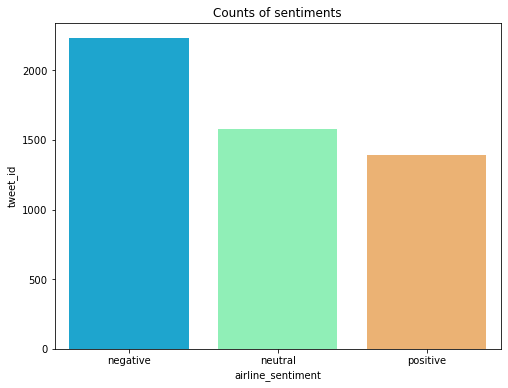

In [211]:
# Counting number of types of sentiments mentioned in airline_sentiment

no_sent=ens_learn.groupby('airline_sentiment')['tweet_id'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,6))
sb.barplot(data=no_sent, x="airline_sentiment", y="tweet_id", palette = "rainbow")
plt.title("Counts of sentiments")

## Relation of Time with Sentiments

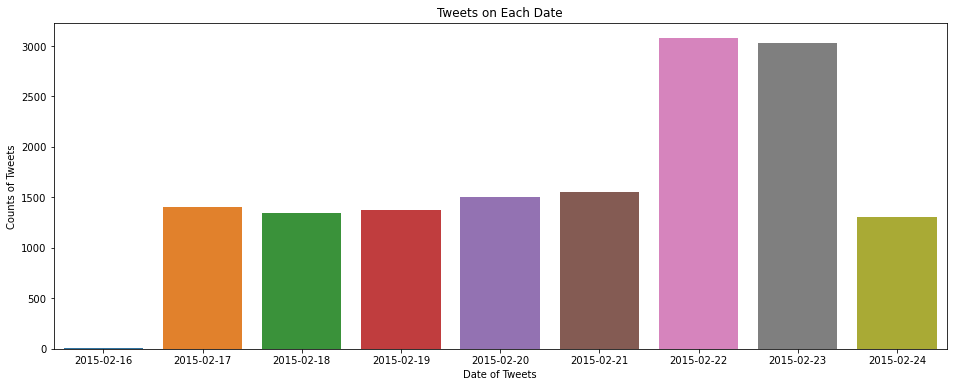

In [212]:
plt.figure(figsize=(16, 6))
tweetcreated= ens_learn['tweet_created']
sb.barplot(x=numberoftweets.Date, y=numberoftweets.Count,
            data=numberoftweets).set(title='Tweets on Each Date')
plt.ylabel("Counts of Tweets")
plt.xlabel("Date of Tweets")
plt.xticks(rotation=0)
plt.show()

### Percentages of Tweets for Each Airline

<AxesSubplot:title={'center':'Tweets Percentages Vs Each Airline'}, ylabel='airline'>

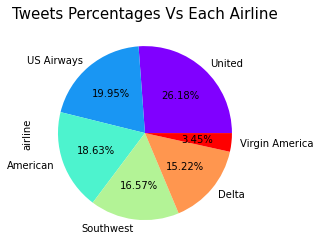

In [213]:
# Checking percentages from each airline
plt.title("Tweets Percentages Vs Each Airline", fontsize=15);
ens_learn.airline.value_counts().plot(kind='pie', autopct='%1.2f%%',cmap="rainbow")

In [214]:
# Checking number of each sentiments for airlines
count = ens_learn.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack()
count

airline_sentiment,negative,neutral,positive
airline,,,
American,1939,455,326
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


Text(0.5, 1.0, 'Airline Wise Sentiments')

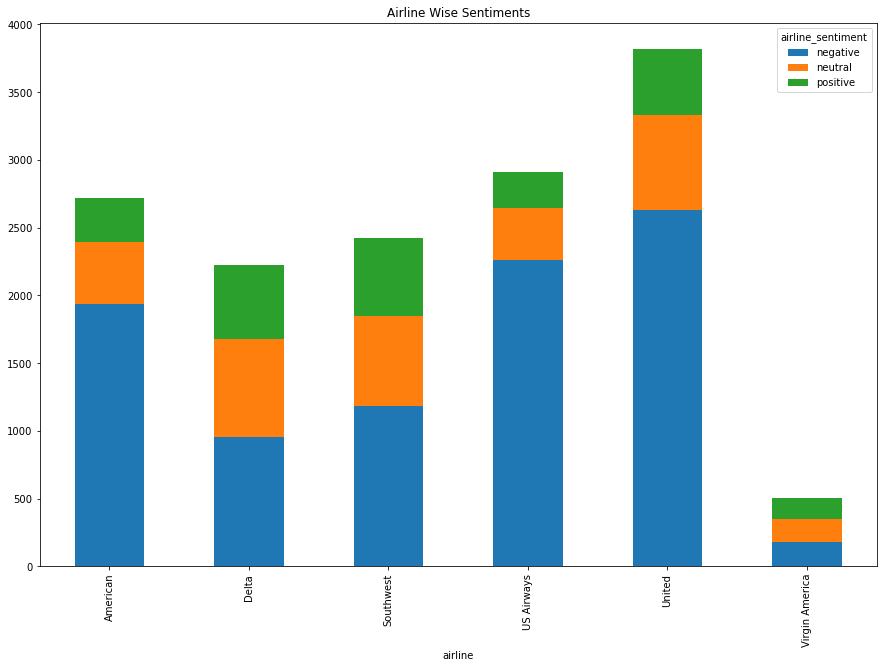

In [215]:
airline = ens_learn.groupby(['airline', 'airline_sentiment']).size()
airline.unstack().plot(kind='bar', stacked=True, figsize=(15,10))
plt.title ("Airline Wise Sentiments")

In [216]:
# Checking Tweets overall
nooftweets=ens_learn.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False)
nooftweets=nooftweets.reset_index()
nooftweets.columns=['Airline', 'Counts of Tweets']
nooftweets


,Airline,Counts of Tweets
0,United,3822
1,US Airways,2913
2,American,2720
3,Southwest,2420
4,Delta,2222
5,Virgin America,504


We can conclude as follows
1) United Airline customers provide the most number of tweets
2) United having the highest proportion of negative tweets and Virgin America having the lowest proportion
3) Most number of tweets are for negative, neutral and positive sentiments correspondingly
4) Virgin America is having the best services and the balance number of data
5) Southwest Airline has the highest positive tweets
6) In the last 3 days, the negative sentiment increased.
7) Virgin America Airline has no relation with time.

## 1.2.2 Reason for the negativity

In [217]:
# Checking the negative reason 

neg_rsns = ens_learn.groupby('negativereason').size().sort_values(ascending=False)
neg_rsns=neg_rsns.reset_index()
neg_rsns.columns = ['Reason', 'Count']
neg_rsns

,Reason,Count
0,Customer Service Issue,2902
1,Late Flight,1660
2,Can't Tell,1190
3,Cancelled Flight,843
4,Lost Luggage,721
5,Bad Flight,580
6,Flight Booking Problems,529
7,Flight Attendant Complaints,480
8,longlines,178
9,Damaged Luggage,74


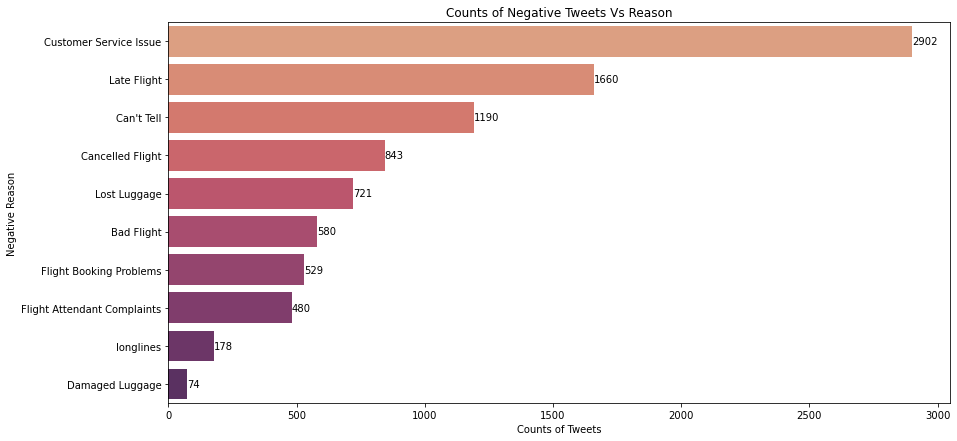

In [218]:
# Plotting the negative reasons with counts

plt.figure(figsize=(14,7))
show = sb.countplot(data = ens_learn, y = 'negativereason',
                   palette='flare',
                   order = ens_learn.negativereason.value_counts().index)

show.bar_label(show.containers[0])
show.set_title('Counts of Negative Tweets Vs Reason')
plt.ylabel("Negative Reason")
plt.xlabel("Counts of Tweets")
plt.show()

Now we need to check the number of words use for the positive and negative sentiments, So we will use wordcloud for that.

## Wordcloud for negative reason 

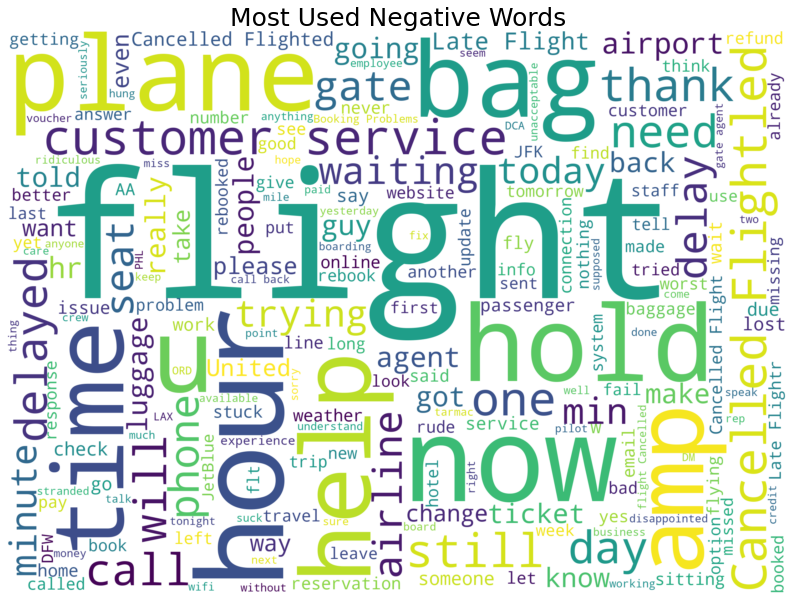

In [219]:
# Cleaning in the start by removing punctuations and making them all small 
ens_learn_temp =ens_learn

ens_learn_temp['text'].map(lambda x: re.sub('[,\.!?]', '', x))
ens_learn_temp['text'].map(lambda x: x.lower())
neg_cloud=ens_learn_temp[ens_learn_temp['airline_sentiment']=='negative']
overall_words = ' '.join(neg_cloud['text'])

cleaned_word = " ".join([word for word in overall_words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])


word_cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='White',
                      width=2500,
                      height=1800
                     ).generate(cleaned_word)
plt.figure(1,figsize=(14, 14))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Negative Words', fontsize=25)
plt.show()


## Wordcloud for Positive reason 

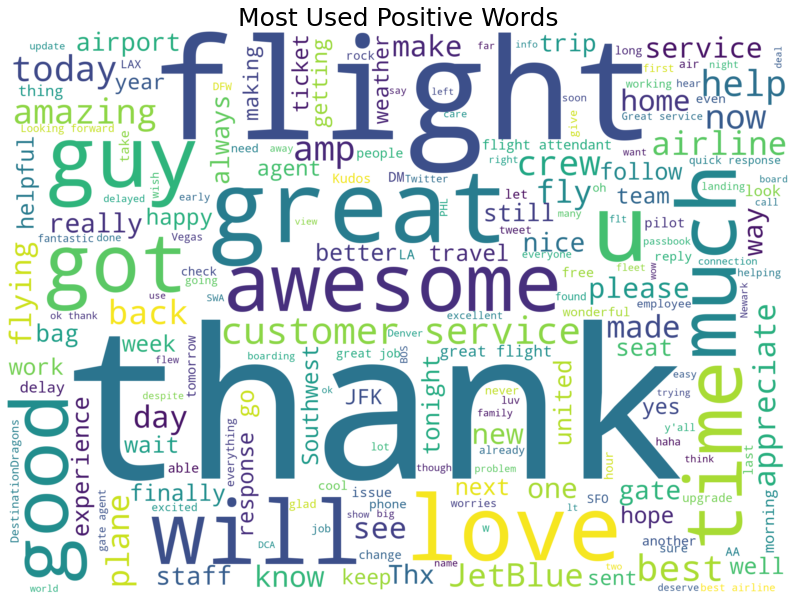

In [220]:
# Cleaning in the start by removing punctuations and making them all small 

ens_learn['text'].map(lambda x: re.sub('[,\.!?]', '', x))
ens_learn['text'].map(lambda x: x.lower())
pos_cloud=ens_learn[ens_learn['airline_sentiment']=='positive']
overall_words = ' '.join(pos_cloud['text'])

cleaned_word = " ".join([word for word in overall_words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])


word_cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='White',
                      width=2500,
                      height=1800
                     ).generate(cleaned_word)
plt.figure(1,figsize=(14, 14))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Positive Words', fontsize=25)
plt.show()


We conclude that the main reason of negativity is Customer Service Issue. The least negativity comes due to the damaged luggage So if the Airlines work on these highlighted things, the customers would give better reviews. This will enhance the Airlines overall. 

##  1.3 Data Preparation

In [222]:
# Removing the URl

def rem_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Removing the stepwords 'english'
def rem_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Removing the html  
def rem_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_at_mentions(text):
    return re.sub(r'@\w+', '', text)


# Removing emojis by codes
def rem_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF" 
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Fixing the text
def fixing(text):
    text = re.sub(r"Mr\'s", " he is", text)
    text = re.sub(r"Mr\'.", " he is", text)
    text = re.sub(r"Ms\'.", " She ", text)
    text = re.sub(r"She\'s", " she is", text)
    text = re.sub(r"I\'m", " i am", text)
    text = re.sub(r"haven\'t", " have not", text)
    text = re.sub(r"you\'r", " you are", text)
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r" plz", " please", text)
    text = re.sub(r"it\'s", " its", text) 
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"He\'s", " he is", text)
    text = re.sub(r"in\'s", " in", text)
    return text  

# Seperate alphabets
def sep_alphabets(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)


def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

ens_learn['final_text'] = ens_learn['text']

ens_learn['final_text'] = ens_learn['final_text'].astype(str).apply(remove_at_mentions)
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : rem_url(x))
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : rem_stopwords(x))
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : rem_html(x))
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : rem_emoji(x))
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : fixing(x))
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : sep_alphabets(x))
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : tweet_to_words(x))
ens_learn['final_text'] = ens_learn['final_text'].astype(str).replace("plz", "please", regex=True)


In [223]:
# result
ens_learn['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minutes late flight warnings communica...
14637            please bring american airlines blackberry
14638    money change flight answer phones suggestions ...
14639    ppl need know many seats next flight please pu...
Name: final_text, Length: 14601, dtype: object

In [225]:
# checking if 
temp=ens_learn['final_text'].str.contains('plz')
temp = pd.DataFrame(temp)
temp[temp['final_text'] == True]
# ens_learn['final_text'][2458]

,final_text


In [226]:
# Assigning columns for the modelling
A = ens_learn['final_text']
y = ens_learn['airline_sentiment']

In [227]:
# TF-IDF Vectorization
tfid = TfidfVectorizer()
A_final =  tfid.fit_transform(A)

In [228]:
# Using Smote to to balance the data if imbalanced
imbalance = SMOTE()
x_sm,y_sm = imbalance.fit_resample(A_final,y)

In [229]:
A_train , A_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)

As we have cleaneded our data and now we will be heading towards the creation of our SVM, Boosting and Decision Tree

##  2) Data Modelling And Approaches 

### 2.1) Boosting Technique

We will perform our boosting using the XGB classifier. Then we will see the accuracy and draw the confusion matrix

In [230]:
boos = XGBClassifier()
# x*10 if x<2 else (x**2 if x<4 else x+10)
y_train_n=y_train.apply(lambda x: 0 if x=='negative' else (1 if x == 'neutral' else 2))
y_test_n=y_test.apply(lambda x: 0 if x=='negative' else (1 if x == 'neutral' else 2))
boos.fit(A_train,y_train_n)
# boos.fit(A_train,y_train)
boos_prediction =  boos.predict(A_test)
accuracy_score(boos_prediction,y_test_n)
# accuracy_score(boos_prediction,y_test)



0.8120267909143856

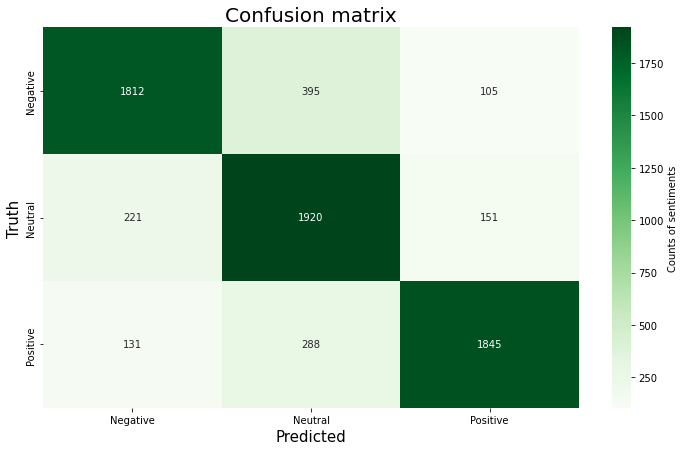

In [252]:
cm = confusion_matrix(y_test_n,boos_prediction)


# plot confusion matrix 
plt.figure(figsize=(12,7))
sen_names = ['Negative', 'Neutral', 'Positive']
sb.heatmap(cm, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Counts of sentiments'}, fmt='d', 
            xticklabels=sen_names,
            yticklabels=sen_names)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

In [232]:
print(classification_report(y_test_n,boos_prediction))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2312
           1       0.74      0.84      0.78      2292
           2       0.88      0.81      0.85      2264

    accuracy                           0.81      6868
   macro avg       0.82      0.81      0.81      6868
weighted avg       0.82      0.81      0.81      6868



### 2.2) SVM Technique 

In [233]:
svm = SVC()
svm.fit(A_train,y_train)
svm_prediction =  svm.predict(A_test)
accuracy_score(svm_prediction,y_test)


0.8686662783925452

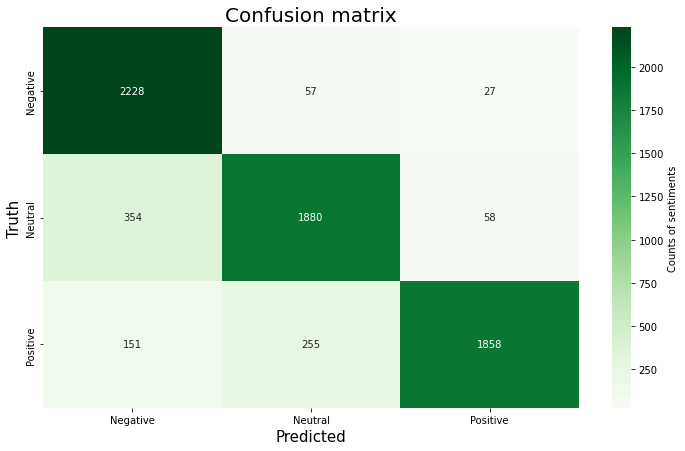

In [253]:
cm_svm = confusion_matrix(y_test,svm_prediction)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sb.heatmap(cm_svm, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Counts of sentiments'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

In [235]:
print(classification_report(y_test,svm_prediction))

              precision    recall  f1-score   support

    negative       0.82      0.96      0.88      2312
     neutral       0.86      0.82      0.84      2292
    positive       0.96      0.82      0.88      2264

    accuracy                           0.87      6868
   macro avg       0.88      0.87      0.87      6868
weighted avg       0.88      0.87      0.87      6868



### 2.3) Decision Tree

In [236]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(A_train,y_train)
decision_tree_pred=decision_tree.predict(A_test)
accuracy_score(decision_tree_pred,y_test)


0.8050378567268491

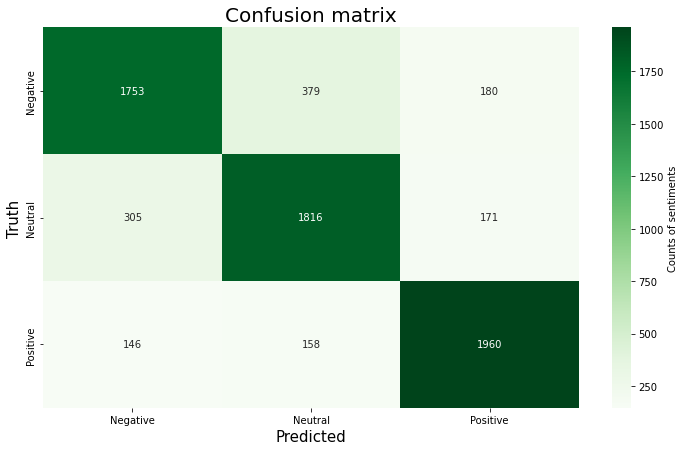

In [254]:
cm_dsn = confusion_matrix(y_test,decision_tree_pred)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sb.heatmap(cm_dsn, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Counts of sentiments'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

In [238]:
print(classification_report(y_test,decision_tree_pred))

              precision    recall  f1-score   support

    negative       0.80      0.76      0.78      2312
     neutral       0.77      0.79      0.78      2292
    positive       0.85      0.87      0.86      2264

    accuracy                           0.81      6868
   macro avg       0.81      0.81      0.81      6868
weighted avg       0.80      0.81      0.80      6868



## Results

In [239]:
df_results = pd.DataFrame()
df_results['Algorithm'] = [
    'Boosting', 'SVM', 'Decision Tree']
df_results['Score'] = [accuracy_score(boos_prediction,y_test_n), accuracy_score(svm_prediction,y_test),accuracy_score(decision_tree_pred,y_test) ]
df_results.columns = ['Algorithm','Score']
df_results

,Algorithm,Score
0,Boosting,0.812027
1,SVM,0.868666
2,Decision Tree,0.805038


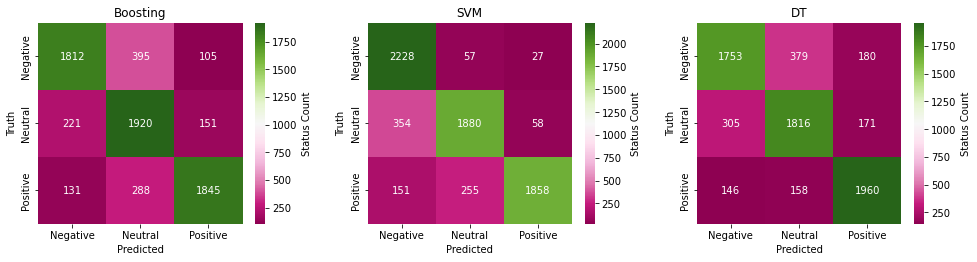

In [251]:
df_cm = pd.DataFrame()
df_cm['Name'] = ['Boosting','SVM','DT']
df_cm['CM'] = [cm,cm_svm,cm_dsn]
df_cm.columns = ['Name','CM']
df_cm = df_cm.transpose()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(14, 4))
ax = ax.flatten()
sentiment_classes = ['Negative', 'Neutral', 'Positive']
index=0
for i in df_cm.columns:
    sb.heatmap(df_cm[i][1], annot=True, ax=ax[index],cbar_kws={'label': 'Status Count'}, fmt='d',  
            xticklabels=sentiment_classes , yticklabels=sentiment_classes ,cmap="PiYG")
    ax[index].set_title(df_cm[i][0])
    ax[index].set_xlabel('Predicted')
    ax[index].set_ylabel('Truth')
    index += 1
plt.tight_layout(pad=2)
plt.show()

Write results at the end